In [103]:
from faker import Faker
import random
import pandas as pd
from random import randrange
from datetime import datetime
import numpy as np

In [104]:
nr_of_trekkers = 100000
# time-stamp
# email, name, height, weight, age, gender, city, locality
# languages, college
# working profession, have you gone trekking
# preference of trek days
# no. of previous treks
# list of treks done
# difficulty of trek
# preferred location of trek
# food preferences

fake = Faker('de_DE')

trekkers = []

In [105]:
# generate a list of ages between 18 and 80 years old, with 1000 entries following a normal distribution
ages = np.random.normal(30, 10, nr_of_trekkers).astype(int)
# generate a list of number of previous treks between 0 and 10, with 1000 entries following a normal distribution
previous_treks = np.random.normal(4, 2, nr_of_trekkers).astype(int)


localities = {
    "Pune":  [
        "Kothrud", "Nal Stop", "Aundh", "Pimpri", "Shivaji Nagar"
    ], # list of localities random 
    "Mumbai": [
        "Bandra", "Andheri", "Borivali", "Ghatkopar", "Kandivali"
    ],
    "Nashik": [
        "Satpur", "Ambad", "Panchavati", "Sadar", "Gangapur"
    ],
    "Kolhapur": [
        "Kagal", "Tarabai Park", "Kasaba Bawada", "D Ward", "Gadhinglaj"
    ],
    "Nagpur": [
        "Kamptee", "Bank Colony", "Kalameshwar", "Reshim Bagh", "Koradi Road"
    ]
}

# list of bias for each city 
#  pune 50% , mumbai 20%, nashik 10%, kolhapur 10%, nagpur 10%
city_bias = [0.35, 0.25, 0.15, 0.15, 0.1]





for customers_id in range(nr_of_trekkers):
    # creating time-stamp:
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'12/31/2022', '%m/%d/%Y')
    transaction_date = fake.date_between(d1, d2)
    # create email:
    email = fake.ascii_email()
    # create trekkers name:
    name = fake.name()

    # create height:
    # height should be between 150 and 200 cm with a skewed towards 160cm
    height = np.random.normal(160, 10, 1).astype(int)
    # create weight:
    # weight should be between 50 and 100 kg with a skewed towards 70kg
    weight = np.random.normal(70, 10, 1).astype(int)



    # create age:
    age = ages[customers_id]
    if age < 10:
        age = 30-age
    
    # create gender:
    # 60% male, 40% female

    gender = np.random.choice(["Male","Female"], p=[0.6, 0.4])

    # create city:
    city = np.random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur", "Nagpur"], p=city_bias)
    # create locality:

    locality = np.random.choice(localities[city])

    # choose max 3 min 1 languages
    languages = np.random.choice(["Marathi", "Hindi", "English", "Gujarati"], p=[0.40, 0.25, 0.25,0.10], size=random.randint(1,3), replace=False)
    # create college:
    college = np.random.choice(["MIT-WPU", "SPPU", "MIT-ADT", "PCCOE", "PICT", "VIT"])
    # create profession:
    # 80% student, 10% working, 10% unemployed
    profession = np.random.choice(["Student", "Working", "Unemployed"], p=[0.40, 0.35, 0.25])
    # create trekking experience:
    # 70% yes, 30% no
    # create YES/NO:
    # create preference of trek days:
    gone_trekking = np.random.choice(["Y", "N"], p=[0.63, 0.37])
    if gone_trekking == "Y":
        num_treks = previous_treks[customers_id]
    else:
        num_treks = 0
    num_treks = abs(num_treks)

    # preference of trek days monday to sunday, min 1 max 7
    preferred_days = np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], size=np.random.randint(1, 7), p=[0.1, 0.08, 0.10, 0.12, 0.15, 0.20, 0.25], replace=False)

    # difficulty of trek
    # 40% easy, 30% medium, 30% hard for middle aged people
    # 25% easy, 40% medium, 35% hard for young people
    # 60% easy, 30% medium, 10% hard for old people
    if age < 30:
        # if num_treks is high, then difficulty is high
        if num_treks > 8:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.25, 0.40, 0.35])
        else:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.35, 0.30, 0.35])
    elif age > 60:
        # if num_treks is high, then difficulty is high
        if num_treks > 8:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.10, 0.30, 0.60])
        else:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.60, 0.30, 0.10])
    else:
        # if num_treks is high, then difficulty is high
        if num_treks > 8:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.30, 0.30, 0.40])
        else:
            difficulty = np.random.choice(["Easy", "Medium", "Hard"], p=[0.40, 0.30, 0.30])



    # food choice:
    food_choice = np.random.choice(["Non-Veg", "Veg", "Vegan"])


    trekkers.append([email, name, height[0], weight[0],age, gender, city, locality, languages, college, profession,
                     gone_trekking, preferred_days, num_treks, difficulty])




In [106]:

trekkers_df = pd.DataFrame(trekkers, columns=['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City', 'Locality',
                                               'Languages', 'college', 'Profession', 'Have you gone Trekking', 'Preferred Days',
                                               'Number of Treks', 'Difficulty of Trek'])

pd.pandas.set_option('display.max_columns', None)
print(trekkers_df)

                          Email-ID                               Name  Height  \
0                 hschottin@gmx.de                 Herr Hagen Hofmann     146   
1                  hkambs@trupp.de     Ing. Karl-Wilhelm Fritsch MBA.     163   
2                xvogt@peukert.com                     Bernward Gunpf     170   
3         aumannfranz-xaver@aol.de                   Hartmuth Steckel     168   
4                hans-h84@kaul.org                    Ricarda Hermann     161   
...                            ...                                ...     ...   
99995           ukaester@binner.de      Prof. Hans-Georg Benthin MBA.     149   
99996     rochusortmann@hethur.com               Vinko Schönland B.A.     141   
99997    sevimdrubin@roehricht.com  Dipl.-Ing. Gottlob Hoffmann B.Sc.     161   
99998       maritawarmer@gmail.com               Miriam Sorgatz-Hövel     170   
99999  ackermannjoerg@stiebitz.com              Herbert Rohleder B.A.     169   

       Weight  Age  Gender 

<AxesSubplot:>

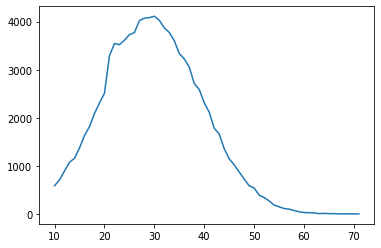

In [107]:
trekkers_df["Age"].value_counts().sort_index().plot(kind="line")

In [108]:
trekkers_df.describe()

,Height,Weight,Age,Number of Treks
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,159.485300,69.488800,29.920600,2.221220
std,9.990136,10.019136,9.373749,2.302102
min,117.000000,25.000000,10.000000,0.000000
25%,153.000000,63.000000,23.000000,0.000000
50%,160.000000,70.000000,30.000000,2.000000
75%,166.000000,76.000000,36.000000,4.000000
max,200.000000,119.000000,71.000000,13.000000


In [109]:
trekkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Email-ID                100000 non-null  object
 1   Name                    100000 non-null  object
 2   Height                  100000 non-null  int64 
 3   Weight                  100000 non-null  int64 
 4   Age                     100000 non-null  int64 
 5   Gender                  100000 non-null  object
 6   City                    100000 non-null  object
 7   Locality                100000 non-null  object
 8   Languages               100000 non-null  object
 9   college                 100000 non-null  object
 10  Profession              100000 non-null  object
 11  Have you gone Trekking  100000 non-null  object
 12  Preferred Days          100000 non-null  object
 13  Number of Treks         100000 non-null  int64 
 14  Difficulty of Trek      100000 non-nu

In [110]:
trekkers_df.to_csv('../Data/trekkers_df_with_bias.csv', index=False)

In [111]:
trekkers_df = pd.read_csv('../Data/trekkers_df_with_bias.csv')
trekkers_df

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,hschottin@gmx.de,Herr Hagen Hofmann,146,66,14,Male,Kolhapur,Tarabai Park,['Hindi'],PICT,Working,Y,['Thursday' 'Saturday' 'Friday' 'Monday' 'Sund...,4,Medium
1,hkambs@trupp.de,Ing. Karl-Wilhelm Fritsch MBA.,163,73,24,Male,Nagpur,Reshim Bagh,['Marathi' 'Hindi'],SPPU,Working,Y,['Saturday' 'Friday'],4,Medium
2,xvogt@peukert.com,Bernward Gunpf,170,69,32,Female,Pune,Nal Stop,['Marathi' 'Hindi' 'English'],MIT-WPU,Unemployed,N,['Sunday' 'Saturday' 'Wednesday' 'Monday'],0,Hard
3,aumannfranz-xaver@aol.de,Hartmuth Steckel,168,61,36,Male,Pune,Aundh,['Hindi' 'Marathi'],SPPU,Student,Y,['Tuesday' 'Sunday'],3,Hard
4,hans-h84@kaul.org,Ricarda Hermann,161,59,38,Female,Mumbai,Andheri,['English' 'Marathi'],SPPU,Student,Y,['Wednesday' 'Sunday'],4,Hard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ukaester@binner.de,Prof. Hans-Georg Benthin MBA.,149,54,34,Female,Pune,Pimpri,['English' 'Marathi' 'Hindi'],SPPU,Unemployed,N,['Friday' 'Sunday' 'Saturday'],0,Easy
99996,rochusortmann@hethur.com,Vinko Schönland B.A.,141,57,44,Male,Pune,Nal Stop,['Hindi'],MIT-ADT,Student,N,['Saturday' 'Sunday' 'Friday' 'Thursday' 'Wedn...,0,Easy
99997,sevimdrubin@roehricht.com,Dipl.-Ing. Gottlob Hoffmann B.Sc.,161,69,46,Female,Nagpur,Kamptee,['Marathi' 'English' 'Gujarati'],MIT-ADT,Unemployed,N,['Saturday' 'Sunday' 'Monday' 'Wednesday'],0,Hard
99998,maritawarmer@gmail.com,Miriam Sorgatz-Hövel,170,63,20,Female,Pune,Kothrud,['Hindi'],VIT,Unemployed,Y,['Thursday' 'Sunday'],3,Easy
